# Teil 2
Ab jetzt werden die mathematisch berechneten Werte für m und As eingesetzt. Für die Berechnung der maximal zu erreichenden Temperaturdifferenz, wird die maximale Leistung des Heizelements dem Temperaturverlust an die Umgebung gleichgesetzt. Dadurch wird der Punkt berechnet, bei dem sich die Wärmeenergie des Glastubus, bei konstanter Heizleistung, nicht mehr ändert.

$0 = q- h_sA_s(T-T_A)$

$T-T_a = q/(h_s A_s)$

Durch die gegebenen Werte für Masse und Aussenfläche des Tubus und einer Heizleistung von bis zu $2 kW$, ergibt sich eine maximal zu erreichende Temperaturdifferenz von 318.31 °K.

Durch genauerer Betrachtung der obrigen Formel lässt sich erkennen, dass sich die maximale Temperaturdifferenz linear zur anliegenden Leistung verhält. Dies bedeutet, dass bei doppelter Leistung auch eine doppelt so hohe Temperaturdifferenz erreicht werden kann.
                    

In [23]:
%matplotlib inline
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import control as c

In [24]:
m = 16.49331431
As = 1.256637061
hs = 5
cp = 1078

In [25]:
#charakteristische Formal für das PT1 Verhalten
def func(x, K, T):
     return K*(1 - np.e**(-x/T))

In [26]:
#Kooeffizientenvergleich liefert werte für T und K
q = 2000
q_max = 2000
T = cp*m/(As*hs)
K = q/(As*hs)/q # skaliere k mit eingangsleistung, muss das sein? immerhin v(t)/u(t) = K*(1-e**(-t/T)) ...oder so
print ("K=" +str(K))
print ("T=" + str(T))


K=0.159154943147
T=2829.74191642


In [27]:
#transferfunktion von PT1
sys = c.tf([K],[T,1])
sys


  0.1592
----------
2830 s + 1

stable amplitude = 18.0273848835
stable mean = 158.93285072


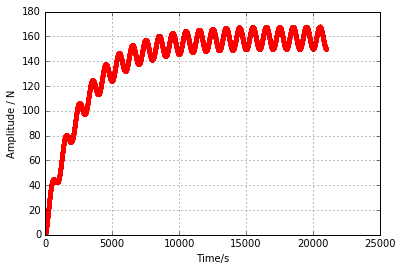

In [38]:
#lege sinusfunktion an wie in aufgabe beschrieben
time = np.arange(0,350*60,0.5)

# timespan: zeitspanne des experiments in sekunden: 600[sek]
# delta_t: zeitdelte der auswertungen, auswertung alle 0.5[sek]
# frequence: frequenz mit der die sinusschwingung beeinflusst
def create_input(timespan, delta_t, frequence):
    array = np.zeros(np.int(timespan/delta_t))
    time = 0
    i = 0
    while time < timespan:
        # variante 1: rechne leistung um, da das k auf basis 2000W bestimmt wurde (sodass 2000W == 1)
        #array[i] = 0.5*np.sin(2*np.pi*frequence*time) + 0.5
        # variente 2: setze k = k/2000 (aktive)
        array[i] = (1000*np.sin(2*np.pi*frequence*time) + 1000)
        i = i+1
        time = time + delta_t
    return array
        
input = create_input(350*60, 0.5, 0.001)      
output, time_out, xout =  c.lsim(sys,input,time)
plt.plot(time_out,output,'r.')
#plt.plot(time,input,'b')
plt.xlabel('Time/s')
plt.ylabel('Amplitude / N')
stable_max = np.max(output[35000:])
stable_min = np.min(output[35000:])
stable_mean = np.mean(output[35000:])

print ("stable amplitude = " +str(stable_max-stable_min))
print ("stable mean = " +str(stable_mean))
plt.grid()

Die Grafik Zeigt die Antwort des Systems auf eine wie in der Aufgabe beschriebene Sinusschwingung des Eingangssignals.
Die Sinusschwingung des Eingangssignals lässt sich eindeutig im Plot erkennen. Schon nach einer Zeit von ca. 13000 ekunden lässt sich eine konstante Schwingung erkennen.Diese Schwingung hat eine Amplitude von ca. 18°K und eine schwingt um einen Wert ca. 159 °K.

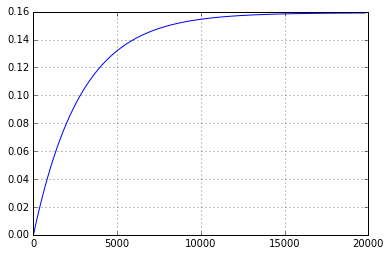

In [29]:
# ist mit unit step responce sprung aus maximalleistung 2kW gemeint oder auf 1W?
# hier -> 1W  da das k skaliert wurde
step_data = c.step_response(sys)
plt.plot(step_data[0],step_data[1])
plt.grid()

# hier muss noch die grafik beschrieben werden


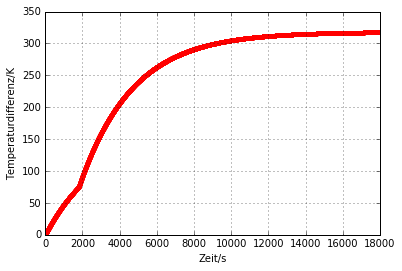

In [39]:
time = np.arange(0,300*60,0.5)
input = np.zeros(len(time))+1000
for i, val in enumerate(time):
    if (val > 30*60): input[i] = 2000
        
output, time_out, xout =  c.lsim(sys,input,time)
plt.plot(time_out,output,'r.')
plt.xlabel('Zeit/s')
plt.ylabel('Temperaturdifferenz/K')
plt.grid()

Der Plot zeigt die geringer werdende Temperaturzunahme bis zu $t=1800$. Der Sprung von 1kW auf 2kW ist deutlich zu erkennen, in Form der plötzlichen Zunahme der Temperatursteigung.

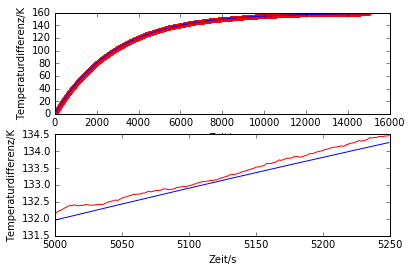

In [33]:
time = np.arange(0,250*60,0.5)
stable_input = np.zeros(len(time))+1000
noise_input = (np.random.rand(len(time))-0.5)*1000
input = stable_input + noise_input
output, time_out, xout =  c.lsim(sys,input,time)
output_stable, time_out_stable, xout_stable =  c.lsim(sys,stable_input,time)

plt.subplot(2, 1, 1)
plt.plot(time_out,output,'r.')
plt.plot(time_out,output_stable,'b')
plt.xlabel('Zeit/s')
plt.ylabel('Temperaturdifferenz/K')

plt.subplot(2, 1, 2)
start_time = 10000
end_time = 10500
plt.plot(time_out[start_time:end_time],output[start_time:end_time],'r')
plt.plot(time_out[start_time:end_time],output_stable[start_time:end_time],'b')
plt.xlabel('Zeit/s')
plt.ylabel('Temperaturdifferenz/K')
plt.show()

Die rote Kurve der obrigen Grafik zeigt die Reaktion des Systems auf ein eingangssignal von 1kW mit einer gleichverteilten Störung von 500W. Die blaue Kurve selbiges System, ohne Störung. In dem hier gezeigten Ausschnitt ist die Störung kaum bis gar nicht zu erkennen, lediglich die mittlere Leistung von 1kW ist erkennbar durch den algemeinen Trend der Kurve. Beide Kurven haben keine deutlichen Abweichungen voneinander.

Bei Betrachtung eines kleinen Zeitintervalls der beiden Kurven, ist der Effekt des Störsignals bei der roten Kurve deutlich zu erkennen. Zu anfangs wirken sich die Leistungsschwankungne noch nicht so deutlich auf die Gradlinigkeit der Kurve aus, was sich im späteren verlauf jedoch ändert, da der Temperaturverlust durch die Wärmeabgabe an die Umgebung einen stärkeren Einfluss erhält. Die Abweichungen zur blauen Kurve sind bei entsprechend genauer Betrachtung gut zu erkennen, jedoch ist die Differenz der beiden Kurven für gewöhnlich unter 1 °K (siehe untere Grafik).

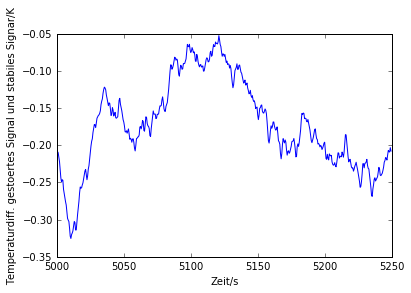

In [37]:
plt.plot(time_out[start_time:end_time],output_stable[start_time:end_time]-output[start_time:end_time],'b')
plt.xlabel('Zeit/s')
plt.ylabel('Temperaturdiff. gestoertes Signal und stabiles Signar/K')